In [1]:
#importing required libraries
import pandas as pd 
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#loading data
drive.mount('data')
data=pd.read_csv('data/My Drive/pubg/train.csv')

Drive already mounted at data; to attempt to forcibly remount, call drive.mount("data", force_remount=True).


In [2]:
#loading saved ANN model
from keras.models import load_model
classifier=load_model('data/My Drive/pubg/my_pubgmodel.h5')


Using TensorFlow backend.
W0712 08:10:08.851734 140013369182080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 08:10:08.889877 140013369182080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 08:10:08.967931 140013369182080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 08:10:08.969447 140013369182080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0712 08:10:08.97

In [0]:
#separating features and target variable
X = data.iloc[:,3:-1].values
Y = data.iloc[:,-1].values

In [0]:
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

In [0]:
#predicting the target variable
pred=classifier.predict(X_test)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [7]:
mean_absolute_error(y_test,pred)

0.0659523294922661

In [8]:
mean_squared_error(y_test,pred)

0.008855043471511743

In [9]:
#first five values in the dataset
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [10]:
#killplace column in the dataset is a categorical one as it describes the place where player got killed
data['killPlace'].unique()

array([ 17,  45,  54,  86,  58,  25,  28,   3,  50,  81,  35,  63,  18,
        10,  93,  39,  80,  79,  11,  31,   1,  59,  13,  34,  60,  55,
        19,  37,  42,   9,  14,  24,  20,  33,   5,  62,  83,  78,  66,
        15,  21,   8,  23,  16,  29,  85,  41,  72,  88,  69,  57,  94,
        61,   2,  36,  75,  90,  65,   4,  51,  12,  46,  87,  49,   7,
        56,  22,  76,  40,  48,   6,  43,  67,  77,  52,  82,  64,  30,
        32,  26,  84,  53,  97,  38,  27,  71,  89,  74,  95,  70,  47,
        98,  91,  68,  44,  73,  96,  92,  99, 100])

In [0]:
#putting mean value of kills at a kill place in an array
arr=[]
for i in data.killPlace.unique():
  arr=np.append(arr,[data[data['killPlace']==i]['kills'].mean()])

In [0]:
#making a dataframe for average kill per place
average_kill_per_place=pd.DataFrame(data=arr,index=data.killPlace.unique(),columns=['average_kills'])
average_kill_per_place=average_kill_per_place.sort_index()

In [13]:

average_kill_per_place.head()

,average_kills
1,8.020866
2,6.027989
3,5.074037
4,4.461933
5,4.014938


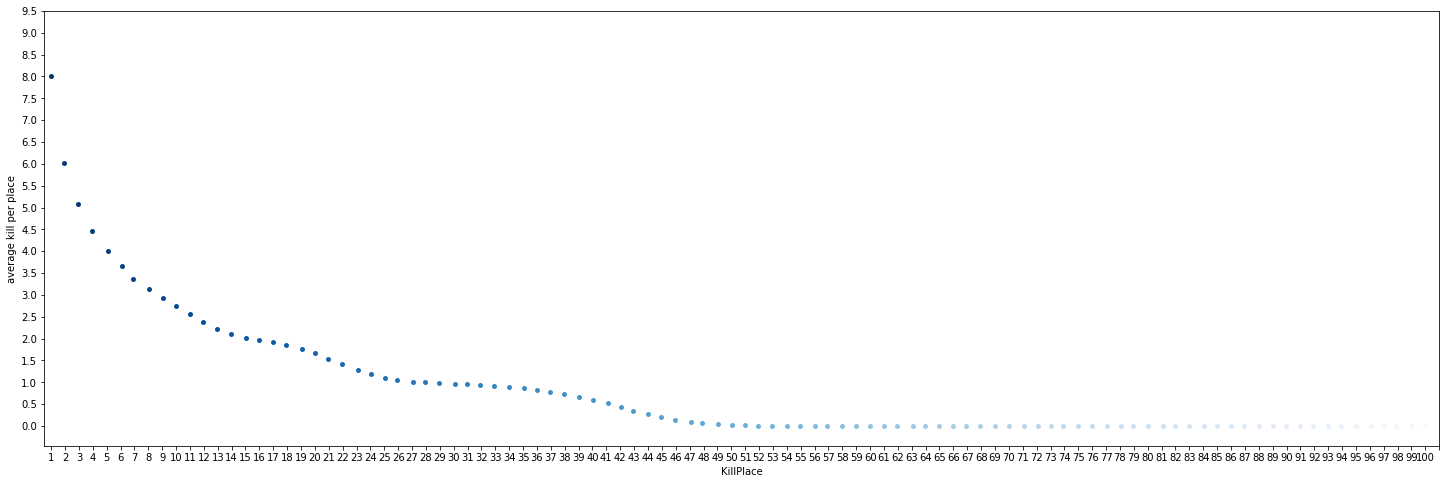

In [14]:
#A strip plot for average kills per place
plt.figure(figsize=(25,8))

sns.stripplot(average_kill_per_place.index,average_kill_per_place['average_kills'],palette='Blues_r')
plt.xlabel('KillPlace')
plt.ylabel('average kill per place')
plt.xticks(np.arange(0,101,step=1))
plt.yticks(np.arange(0,10,step=0.5))
plt.tight_layout
plt.show()

In [0]:
#LEADERBOARD CREATION

In [16]:
#counting the number of matches in data
data['matchId'].nunique()

47734

In [0]:
#grouping the data by groupId column to get top groups
data_acc_group=data.groupby('groupId').sum()

In [0]:
#sorting groups for highest winpoints and kills
highest_groups=data_acc_group['winPoints'].sort_values(ascending=False).head(100)
highest_groups=pd.DataFrame(highest_groups)

highest_group_kills=pd.DataFrame(data_acc_group['teamKills'].sort_values(ascending=False).head(100))

In [0]:
#sorting groups for highest distance travelled by groups
data_acc_group['totaldistance']=data_acc_group['swimDistance']+data_acc_group['rideDistance']+data_acc_group['walkDistance']
highest_group_dist=pd.DataFrame(data_acc_group['totaldistance'].sort_values(ascending=False).head(100))

In [20]:
#grouping data according to player id
data_acc_id = data.groupby('Id').sum()
data_acc_id.head(5)

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,,,,,
0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [0]:
#sorting winpoints to get players with highest win points
highest_winPlacePerc = data_acc_id['winPoints'].sort_values(ascending=False)
highest_winPlacePerc=pd.DataFrame(highest_winPlacePerc)

In [0]:
#sorting total distance to get players with highest distance travelled

highest_swim_dist = data_acc_id['swimDistance'].sort_values(ascending=False)
highest_walk_dist = data_acc_id['walkDistance'].sort_values(ascending=False)
highest_ride_dist = data_acc_id['rideDistance'].sort_values(ascending=False)
data_acc_id['total_dist'] = data_acc_id['swimDistance'].sort_values(ascending=False) + data_acc_id['walkDistance'].sort_values(ascending=False) + data_acc_id['rideDistance'].sort_values(ascending=False)

In [0]:
highest_dist=pd.DataFrame(data_acc_id['total_dist'].sort_values(ascending=False))


In [0]:
#sorting kills to get players with highest kills

highest_kills = data_acc_id['kills'].sort_values(ascending=False)
highest_kills=pd.DataFrame(highest_kills)


In [0]:
from IPython.display import display_html 


In [0]:
#function to display pandas dataframes side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [27]:
display_side_by_side(highest_group_dist.head(10),highest_group_kills.head(10),highest_groups.head(10))

,totaldistance
groupId,
1223908,176296.3690
737999,145251.1100
1013262,137219.9000
1742978,96125.6000
560857,93697.4000
1386844,93517.0055
560856,89731.3210
1114747,84369.1000
560863,81847.9000


In [28]:
display_side_by_side(highest_kills.head(10),highest_dist.head(10),highest_winPlacePerc.head(10))

,kills
Id,
1297658,60
162743,49
94553,48
4303492,42
75982,41
299122,41
26362,41
1096668,41
727928,39
